# Intro to AI 2024
### Week 9. Evolutionary Computation

**Agenda:**
- Traveling salesman problem

**Tasks:**
- fill in the gaps in the code
- feel free to change code as you wish


# The Travelling Salesman Problem

Find the shortest round trip through $n$ cities.

How can you solve these problem?
- exhaustive search
- However, if $P≠NP$, we can not expect any fast algorithm to emerge, ever
- The exhaustive search will let you solve problems up to 15 cities in few days
- Held-Karp algorithm let you solve instances up to 30–50 cities, optimistically
- Christofides Algorithm will give you a solution in a short amount of time that is at most 50% longer than the shortest round trip

### Crossover Example
![](https://github.com/RufinaMay/CV2019Fall_Pictures/blob/master/crossover1.png?raw=true)

![](https://github.com/RufinaMay/CV2019Fall_Pictures/blob/master/crossover2.png?raw=true)

![](https://github.com/RufinaMay/CV2019Fall_Pictures/blob/master/crossover3.png?raw=true)

![](https://github.com/RufinaMay/CV2019Fall_Pictures/blob/master/traveling_salesman.gif?raw=true)

## Initial data

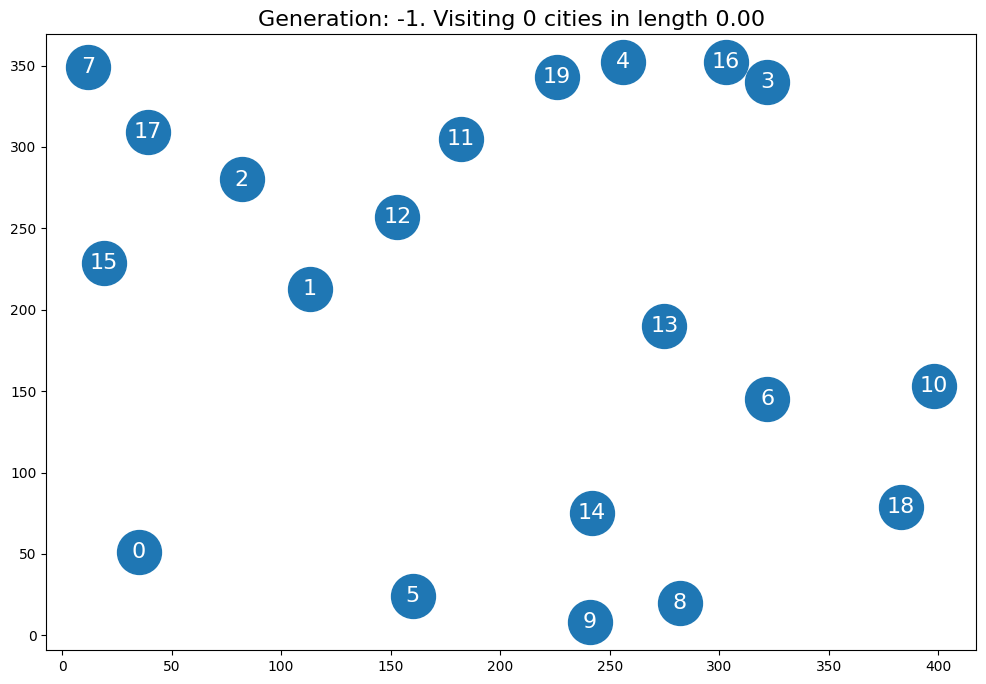

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

def compute_distances(cities):
    distances = []
    for from_city in cities:
        row = []
        for to_city in cities:
            row.append(np.linalg.norm(from_city - to_city))
        distances.append(row)
    return np.array(distances)

def create_fitness(cities):
    distances = compute_distances(cities)
    def fitness(individual):
        res = 0
        for i in range(len(individual)):
            res += distances[individual[i], individual[(i + 1) % len(individual)]]
        return -res
    return fitness

def route_length(distances, route):
    length = 0
    for i in range(len(route)):
        length += distances[route[i], route[(i + 1) % len(route)]]
    return length

def plot_route(cities, route, distances, generation, show=False):
    length = route_length(distances, route)
    plt.figure(figsize=(12, 8))
    plt.scatter(x=cities[:, 0], y=cities[:, 1], s=1000, zorder=1)
    for i in range(len(cities)):
        plt.text(cities[i][0], cities[i][1], str(i), horizontalalignment='center', verticalalignment='center', size=16, c='white')
    for i in range(len(route)):
        plt.plot([cities[route[i]][0], cities[route[(i + 1) % len(route)]][0]],
                 [cities[route[i]][1], cities[route[(i + 1) % len(route)]][1]], 'k', zorder=0)
    plt.title(f'Generation: {generation}. Visiting {len(route)} cities in length {length:.2f}', size=16)
    if show:
        plt.show()
    plt.savefig(f'{generation}.png')
    plt.close()

distances = compute_distances(cities)
fitness = create_fitness(cities)
plot_route(cities, route=[], distances=distances, generation=-1, show=True)

## Implementation

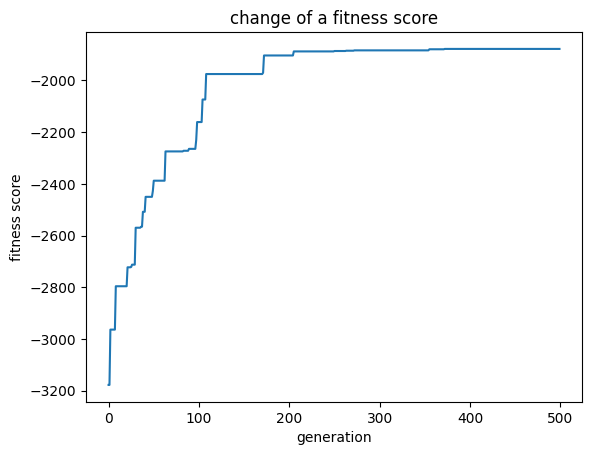

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

def get_individual(n_cities):
    return np.random.choice(n_cities, n_cities, replace=False)

def initial_population(n_cities, population_size, fitness):
    population = [get_individual(n_cities) for _ in range(population_size)]
    population.sort(key=lambda x: fitness(x))
    return population

def get_parents(population, n_offsprings):
    mothers = population[-2 * n_offsprings::2]
    fathers = population[-2 * n_offsprings + 1::2]
    return mothers, fathers

def cross(mother, father):
    mother_head = mother[:int(len(mother) * 0.5)].copy()
    mother_tail = mother[int(len(mother) * 0.5):].copy()
    father_tail = father[int(len(father) * 0.5):].copy()
    mapping = {father_tail[i]: mother_tail[i] for i in range(len(father_tail))}
    for i in range(len(mother_head)):
        if mother_head[i] in mapping:
            mother_head[i] = mapping[mother_head[i]]
    return np.concatenate((mother_head, father_tail))

def mutate(offspring):
    idx1, idx2 = np.random.choice(len(offspring), 2, replace=False)
    offspring[idx1], offspring[idx2] = offspring[idx2], offspring[idx1]
    return offspring

def replace_population(population, new_individuals, fitness):
    population.extend(new_individuals)
    population.sort(key=lambda x: fitness(x))
    return population[-len(new_individuals):]

def evolution_step(population, population_size, fitness, n_offsprings):
    mothers, fathers = get_parents(population, n_offsprings)
    offsprings = []
    for mother, father in zip(mothers, fathers):
        offspring = mutate(cross(mother, father))
        offsprings.append(offspring)
    new_population = replace_population(population, offsprings, fitness)
    return new_population

def evolution(n_cities, fitness, population_size=100, n_offsprings=30, generations=10):
    fitness_change = []
    population = initial_population(n_cities, population_size, fitness)
    for generation in range(generations):
        population = evolution_step(population, population_size, fitness, n_offsprings)
        best_individual = population[-1]
        fitness_change.append(fitness(best_individual))
        plot_route(cities, route=best_individual, distances=distances, generation=generation)
    return fitness_change

generations = 500
fitness_change = evolution(len(cities), create_fitness(cities), population_size=100, n_offsprings=30, generations=generations)

plt.plot(fitness_change)
plt.title('change of a fitness score')
plt.xlabel('generation')
plt.ylabel('fitness score')
plt.show()

<ipython-input-3-110c5230d025>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{generation}.png')


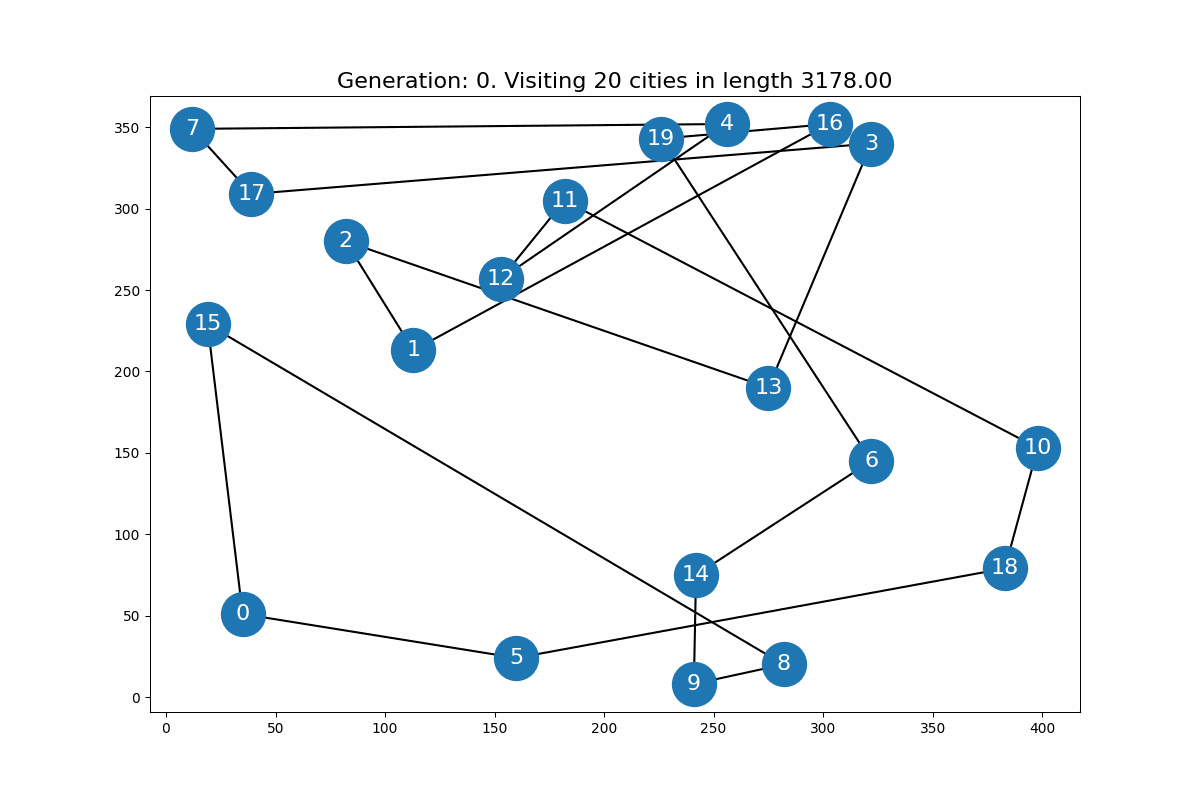

In [ ]:
from IPython.display import Image

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for generation in range(generations):
        image = imageio.imread(f'{generation}.png')
        writer.append_data(image)

Image(open('mygif.gif','rb').read())

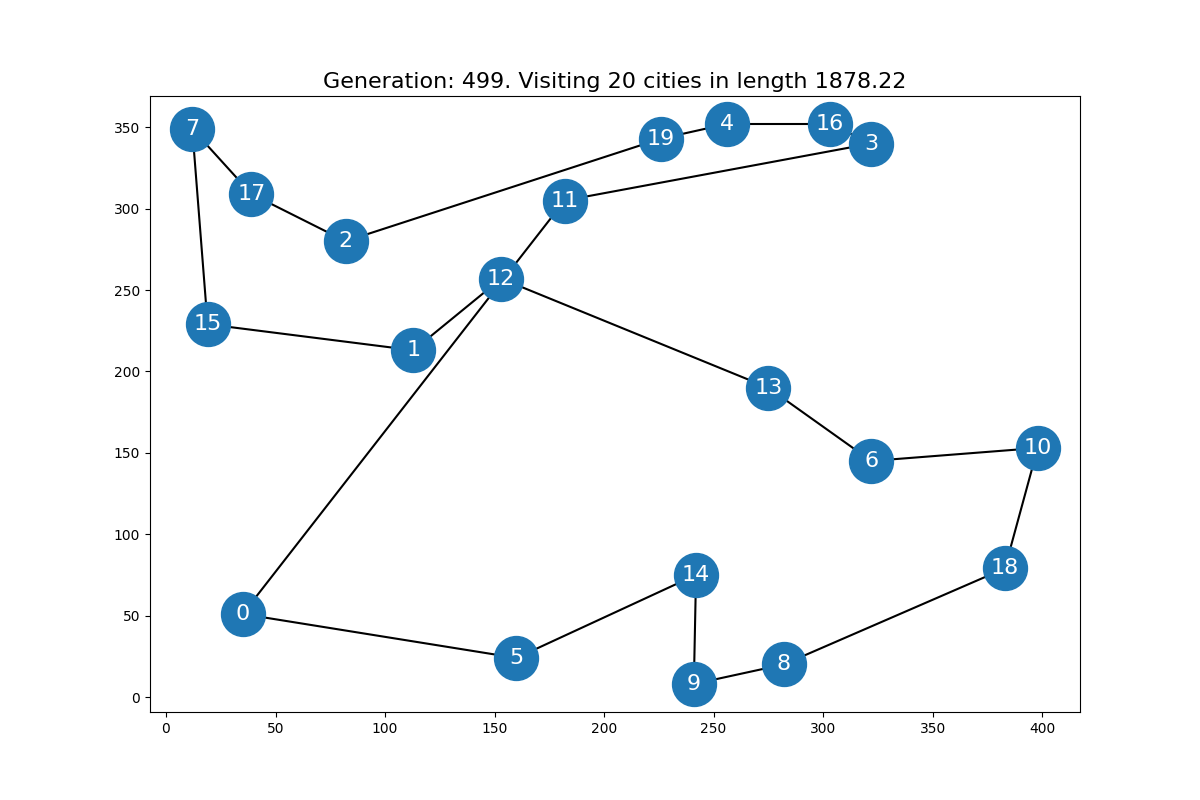

In [ ]:
Image(open(f'{generations-1}.png','rb').read())